In [146]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [147]:
W = 0.3
b = 0.5

In [148]:
x = torch.arange(0, 100)
y = W*x + b

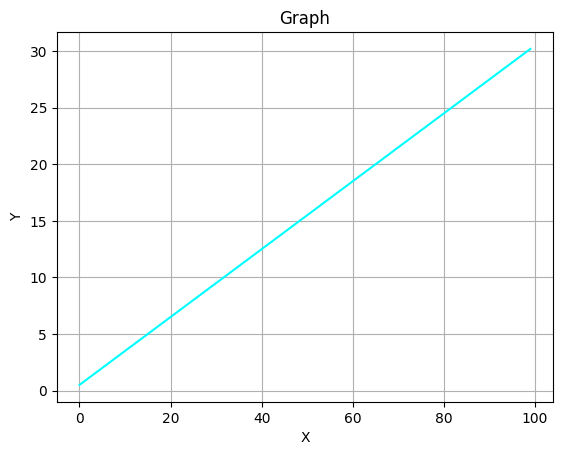

In [149]:
def plot2D(X: np.ndarray,
           Y: np.ndarray,
           Z: np.ndarray= None,
           color= 'cyan',
           grid= True,
           xlbl= "X",
           ylbl= "Y",
           title= "Graph"):

    plt.plot(X, Y, color= color)
    if Z is not None:
        plt.plot(X, Z, color= color)
    plt.title(title)                   # Set a title for the whole page.
    plt.xlabel(xlbl)                   # Label x axis with "X"
    plt.ylabel(ylbl)                   # Label y axis with "Y"
    plt.grid(grid)                     # Add grid to the graph.

plot2D(x, y)

In [150]:
split_border = int(0.8 * len(x))

xtrain, ytrain = x[:split_border], y[:split_border]
xtest, ytest   = x[split_border:], y[split_border:]

In [151]:
class LRM(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.weight = torch.nn.Parameter(torch.rand(1))
        self.bias   = torch.nn.Parameter(torch.rand(1))

    def forward(self, X):
        return self.weight*X + self.bias

In [152]:
model = LRM()

In [153]:
loss_fn = torch.nn.L1Loss()
optimiz = torch.optim.SGD(model.parameters(), lr= 0.001)

In [683]:
epochs = 100
torch.manual_seed(42)

for i in range(epochs):
    model.train()
    ymdl = model(xtrain)
    loss = loss_fn(ymdl, ytrain)
    optimiz.zero_grad()
    loss.backward()
    optimiz.step()


print(f"loss  :", round(float(loss), 3))
print(f"Weight: {round(float(list(model.parameters())[0]), 3)} --> {W}")
print(f"Bias  : {round(float(list(model.parameters())[1]), 3)} --> {b}")

loss  : 0.152
Weight: 0.3 --> 0.3
Bias  : 0.5 --> 0.5
